In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './032018_48hrs/'

path_cyt = folder + 'Cytoplasm_Cancer_Cells.xlsx'
path_nuc = folder + 'Nucleus_Cancer_Cells.xlsx'

cols = ['Cell ID', 
        'BT474-H2BeGFP (Cycle 1 - FITC)', 
        'MCL1 (Cycle 2 - Cy3)', 
        'p-p65NFkB (Cycle 2 - Cy5)', 
        'p-Akt (Cycle 3 - FITC)',
        'aSMA (Cycle 3 - Cy3)',
        'p-gH2AX (Cycle 3 - Cy5)',
        'GRP78 (Cycle 4 - FITC)',
        'Vimentin (Cycle 4 - Cy3)']

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT474+C3H-3,Cntrl(re,c2-4)',
        'BT474+C3H-3,30nM(re,c5-7)',
        'BT474+C3H-3,300nM(re,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t, names=cols))
    df = pd.concat(dt, ignore_index=True)
    return df

In [2]:
df_cyt = concat_df(path_cyt)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
0,11100020013,311103.3,101851.6,43709.0,73056.7,101851.6,6120.7,16078.1,12079.2
1,11100030022,162176.2,183881.8,104492.1,206216.4,183881.8,23716.0,23564.9,31449.9
2,11100040016,538824.0,84439.7,45970.9,70549.5,84439.7,1426.4,20359.0,16116.3
3,11100050019,217196.1,58911.0,26316.6,27367.7,58911.0,2993.7,17980.0,21591.7
4,11100060017,55856.2,80966.3,32906.0,21788.7,80966.3,1625.9,7795.0,15434.6
...,...,...,...,...,...,...,...,...,...
164513,49911641030,38079.1,88751.1,95950.0,25348.7,88751.1,16116.3,21898.2,24713.6
164514,49911681033,262936.0,68296.2,24322.2,35124.5,68296.2,10294.5,11867.8,31020.3
164515,49911691034,48846.5,44616.7,26597.6,20752.9,44616.7,3119.3,5905.9,17833.1
164516,49911721034,96468.8,40339.2,16100.2,26939.8,40339.2,10418.5,12620.9,15018.5


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164518 entries, 0 to 164517
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         164518 non-null  int64  
 1   BT474-H2BeGFP (Cycle 1 - FITC)  164518 non-null  float64
 2   MCL1 (Cycle 2 - Cy3)            164518 non-null  float64
 3   p-p65NFkB (Cycle 2 - Cy5)       164518 non-null  float64
 4   p-Akt (Cycle 3 - FITC)          164518 non-null  float64
 5   aSMA (Cycle 3 - Cy3)            164518 non-null  float64
 6   p-gH2AX (Cycle 3 - Cy5)         164518 non-null  float64
 7   GRP78 (Cycle 4 - FITC)          164518 non-null  float64
 8   Vimentin (Cycle 4 - Cy3)        164518 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 11.3 MB


In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

31610480699    1
15801470403    1
32400320030    1
25104590366    1
24806530585    1
              ..
22102590221    1
22311521036    1
33903230251    1
14900970253    1
46303100343    1
Name: Cell ID, Length: 164518, dtype: int64

In [5]:
# Cytoplasm markers' statistics
df_cyt[cols[1:]].describe()

,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,1.6e+05,1.6e+05,1.6e+05,1.6e+05,1.6e+05,1.6e+05,1.6e+05,1.6e+05
mean,9.5e+04,1.2e+05,6.0e+04,5.6e+04,1.2e+05,1.1e+04,2.5e+04,4.0e+04
std,1.3e+05,8.4e+04,6.9e+04,4.0e+04,8.4e+04,1.8e+04,2.7e+04,7.1e+04
min,2.2e+04,0.0e+00,6.8e+02,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,2.9e+04,7.5e+04,2.0e+04,3.2e+04,7.5e+04,4.3e+03,1.6e+04,2.4e+04
50%,4.3e+04,1.0e+05,3.7e+04,4.6e+04,1.0e+05,7.1e+03,2.2e+04,3.3e+04
75%,9.5e+04,1.5e+05,7.7e+04,6.9e+04,1.5e+05,1.3e+04,3.0e+04,4.6e+04
max,2.7e+06,8.8e+06,3.9e+06,3.6e+06,8.8e+06,1.2e+06,4.2e+06,8.8e+06


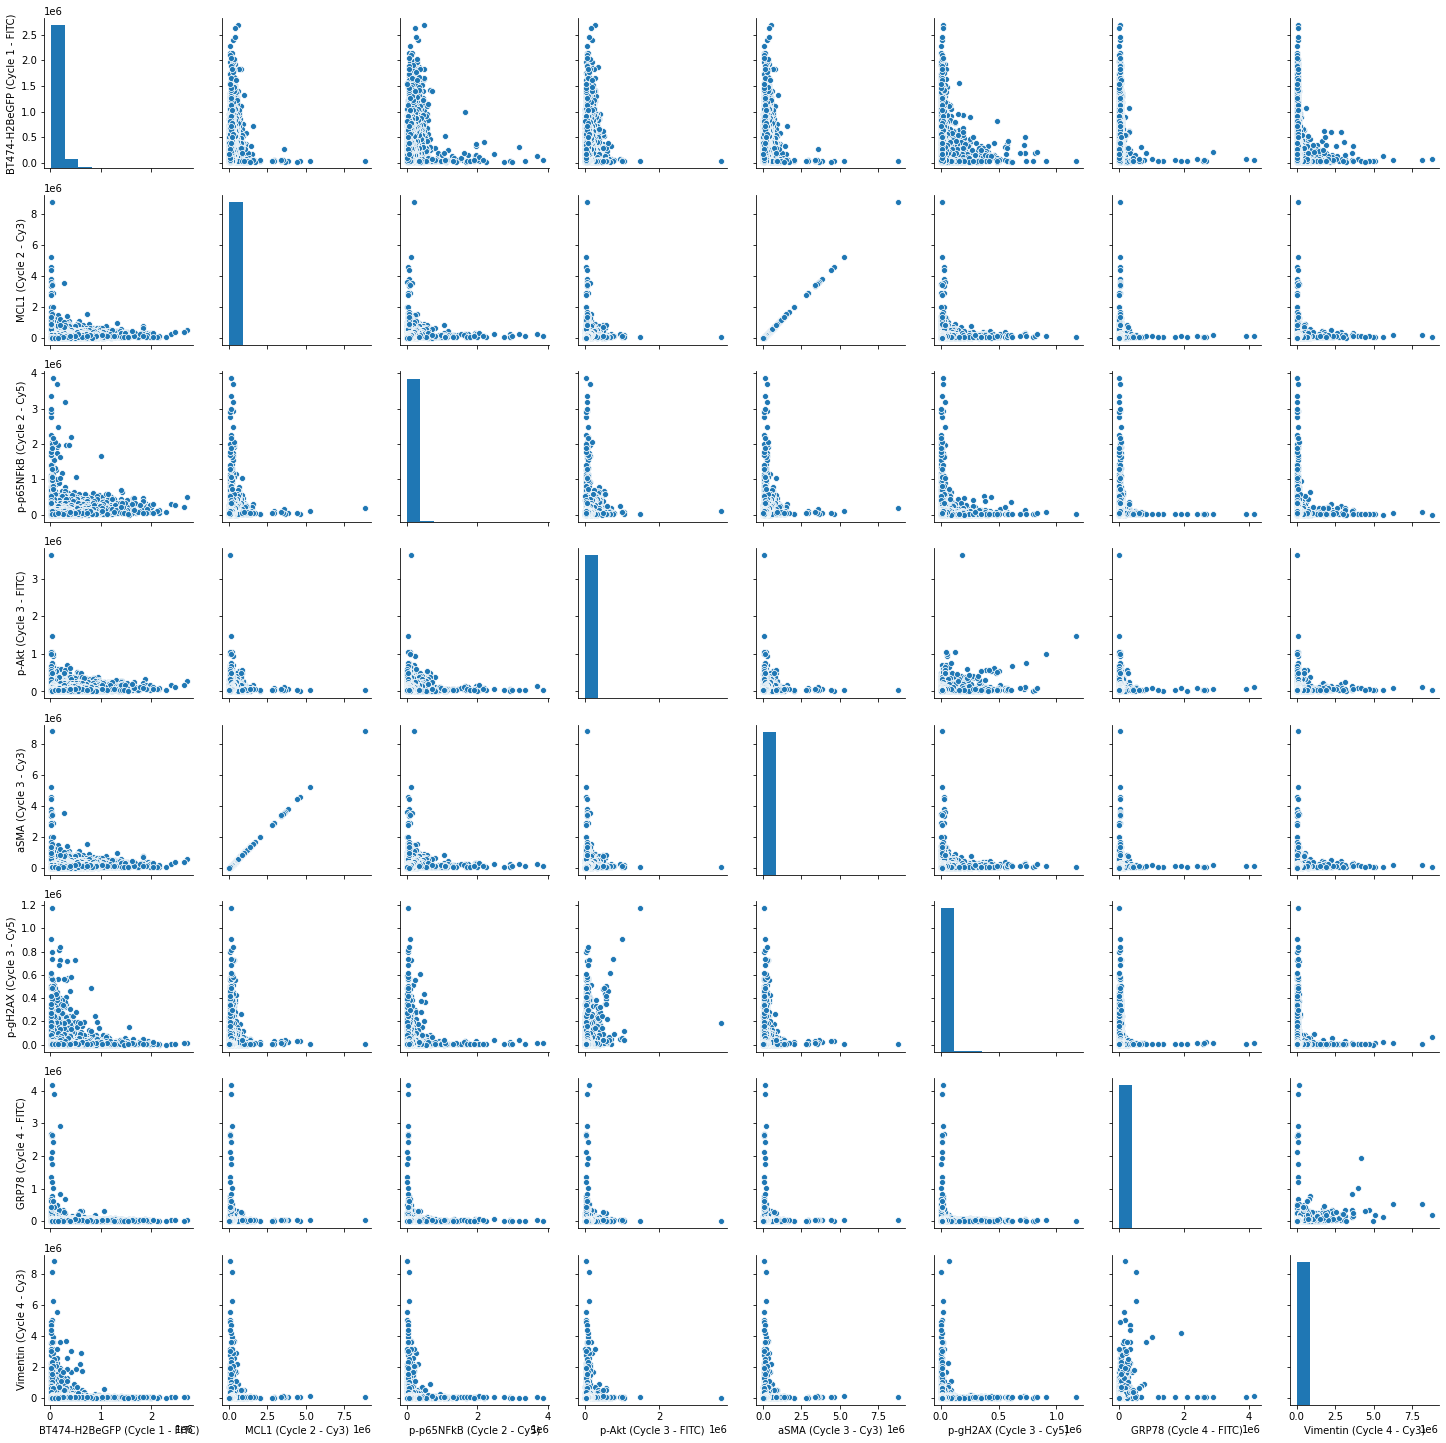

In [6]:
sns.pairplot(df_cyt[cols[1:]])
plt.show()

In [7]:
df_nuc = concat_df(path_nuc)
print('*** Nucleus Dataset:')
df_nuc

*** Nucleus Dataset:


,Cell ID,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
0,11100020013,4.0e+05,144126.7,53127.4,80662.3,144126.7,6628.4,15294.5,13145.6
1,11100030022,1.2e+06,707129.5,308543.5,456920.4,707129.5,52415.0,88088.8,88175.4
2,11100040016,8.9e+05,75235.3,35813.9,73964.3,75235.3,332.8,26913.5,21894.8
3,11100050019,5.3e+05,128568.1,53633.4,38732.9,128568.1,4874.3,34775.5,40027.6
4,11100060017,1.1e+05,83709.5,29532.7,23318.7,83709.5,3492.9,10122.2,21731.8
...,...,...,...,...,...,...,...,...,...
140098,49911641030,5.1e+04,58990.8,79317.5,17572.4,58990.8,13902.9,15825.1,17120.7
140099,49911681033,1.2e+06,206106.9,112673.4,89544.1,206106.9,13633.8,19430.1,42299.6
140100,49911691034,2.5e+04,23812.0,12798.3,9009.9,23812.0,2418.0,3672.9,9368.2
140101,49911721034,7.9e+04,32666.5,17186.1,14975.2,32666.5,8839.3,10663.8,14687.4


In [8]:
# All columns in the Nucleus dataset's information
df_nuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140103 entries, 0 to 140102
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         140103 non-null  int64  
 1   BT474-H2BeGFP (Cycle 1 - FITC)  140103 non-null  float64
 2   MCL1 (Cycle 2 - Cy3)            140103 non-null  float64
 3   p-p65NFkB (Cycle 2 - Cy5)       140103 non-null  float64
 4   p-Akt (Cycle 3 - FITC)          140103 non-null  float64
 5   aSMA (Cycle 3 - Cy3)            140103 non-null  float64
 6   p-gH2AX (Cycle 3 - Cy5)         140103 non-null  float64
 7   GRP78 (Cycle 4 - FITC)          140103 non-null  float64
 8   Vimentin (Cycle 4 - Cy3)        140103 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 9.6 MB


In [9]:
# Check if duplicate ID exists in Nucleus dataset
df_nuc['Cell ID'].value_counts()

31610480699    1
23712411007    1
21710310795    1
28908260747    1
26904450432    1
              ..
21400630051    1
16501670693    1
24908370727    1
39409400610    1
48907010612    1
Name: Cell ID, Length: 140103, dtype: int64

In [10]:
# Nucleus Markers' statistics
df_nuc[cols[1:]].describe()

,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05
mean,2.5e+05,1.9e+05,9.0e+04,8.7e+04,1.9e+05,1.9e+04,3.5e+04,5.3e+04
std,4.8e+05,2.4e+05,1.3e+05,9.6e+04,2.4e+05,4.8e+04,4.4e+04,1.1e+05
min,2.2e+04,0.0e+00,2.4e+02,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.4e+04,7.2e+04,2.1e+04,3.3e+04,7.2e+04,5.2e+03,1.5e+04,2.3e+04
50%,6.7e+04,1.2e+05,4.2e+04,5.5e+04,1.2e+05,1.0e+04,2.5e+04,3.8e+04
75%,2.3e+05,2.2e+05,9.7e+04,1.0e+05,2.2e+05,2.0e+04,4.2e+04,6.4e+04
max,1.2e+07,1.9e+07,4.6e+06,2.4e+06,1.9e+07,4.7e+06,5.6e+06,1.4e+07


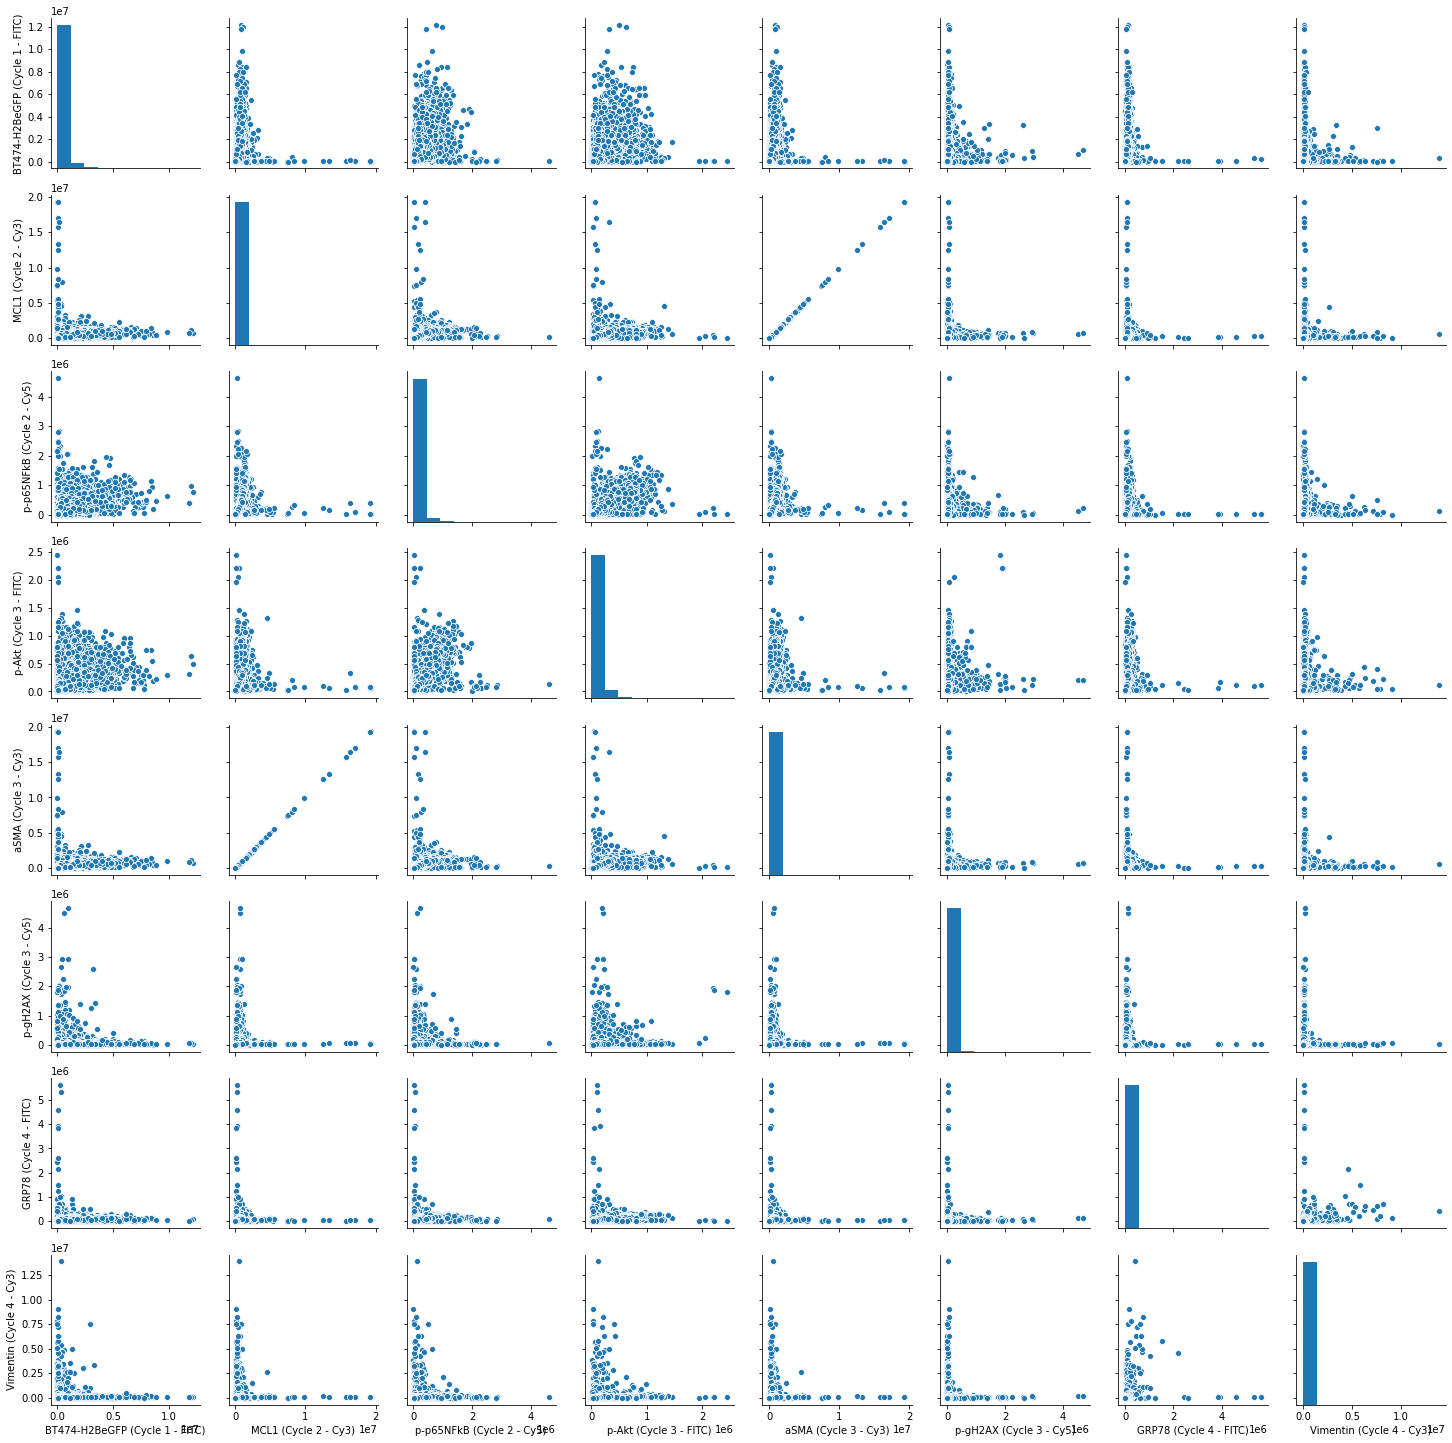

In [11]:
sns.pairplot(df_nuc[cols[1:]])
plt.show()

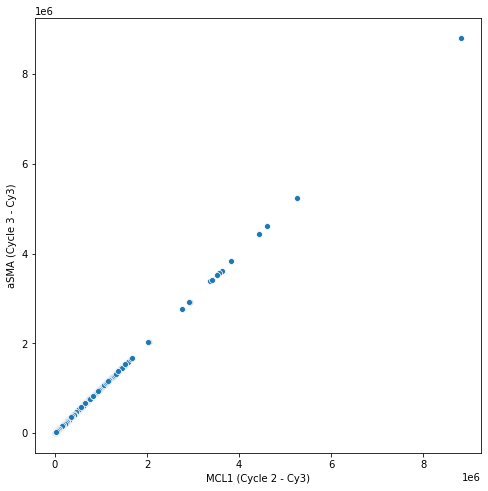

In [17]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(data=df_cyt, 
                x='MCL1 (Cycle 2 - Cy3)',
                y='aSMA (Cycle 3 - Cy3)')
plt.show()

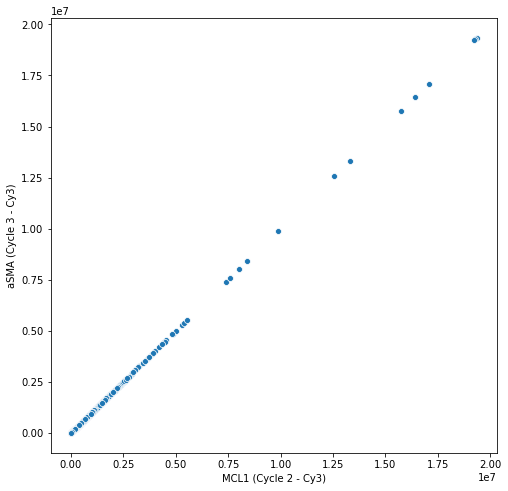

In [18]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(data=df_nuc, 
                x='MCL1 (Cycle 2 - Cy3)',
                y='aSMA (Cycle 3 - Cy3)')
plt.show()